# Reading Data

In [1]:
import pandas as pd
data = pd.read_csv ("housing.csv")
print (f"data shape: {data.shape}")
data.head()

data shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Preprocessing

## 1. Checking and treating Missing Values

In [2]:
print(data.isnull().mean()*100)
median = data['total_bedrooms'].median()
print(median)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64
435.0


In [3]:
data['total_bedrooms'].fillna (median, inplace = True)
print(data.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7896\2474811011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna (median, inplace = True)


## 2. Outlier Treatment

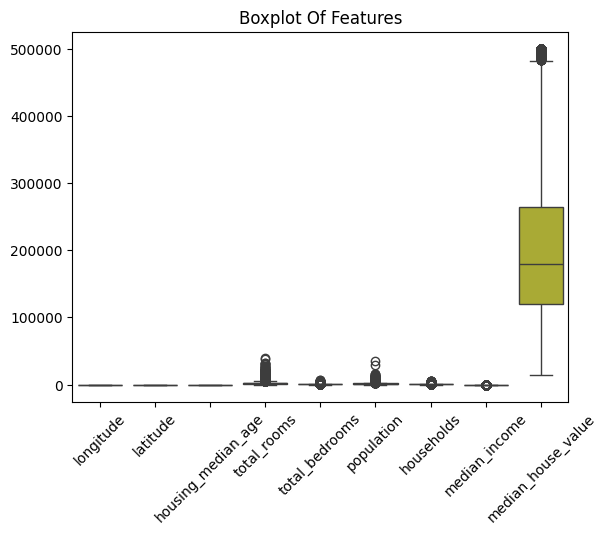

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes (include= 'number')

sns.boxplot (data=numeric_data)
plt.xticks (rotation = 45)
plt.title ('Boxplot Of Features')
plt.show()

## 3. Checking Multicollinearity

In [5]:
correlation_matrix = data.drop('ocean_proximity', axis=1).corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773    0.055310      -0.015176   
latitude                 -0.066484   -0.108785   -0.071035      -0.079809   
housing_

In [6]:
data.drop(['total_rooms', 'households'], axis=1, inplace=True)

## 4. Encoding

In [7]:

print (data['ocean_proximity'].unique())

one_hot = pd.get_dummies (data, columns=['ocean_proximity'])

data=data.drop('ocean_proximity', axis=1, inplace=True)

data = pd.concat ([data, one_hot], axis=1)

data.head()

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_bedrooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,129.0,322.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,1106.0,2401.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,190.0,496.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,235.0,558.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,280.0,565.0,3.8462,342200.0,False,False,False,True,False


In [8]:
data.columns = data.columns.str.replace(r'[<>\//]', '_', regex=True)

## 5. Difining Train and Test data

In [9]:

from sklearn.model_selection import train_test_split


X = data.drop ('median_house_value', axis=1)
y = data ['median_house_value']

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 11)
(4128, 11)
(16512,)
(4128,)


# Model training

In [10]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, subsample=0.6, random_state=42)

model.fit (x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold (n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score (model, X, y, cv=cv, scoring='roc_auc')

print ("AUC CV Scores:", scores, "mean:", scores.mean())

c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\metrics\_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
  File "c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\utils\validation.py", line 2283, in _check_response_method
    raise AttributeError(
    ...<2 lines>...
    )
Attri

AUC CV Scores: [nan nan nan nan nan] mean: nan


c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\metrics\_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
  File "c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\utils\validation.py", line 2283, in _check_response_method
    raise AttributeError(
    ...<2 lines>...
    )
AttributeError: XGBRegressor has none of the following attributes: decision_function, predict_proba.

  warnings.warn(


# Hyperparameter Tuning

In [12]:
#Hyperparameter tuning using RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'regressor__n_estimators': [100, 300, 400],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7,9],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]
}


random_search = RandomizedSearchCV (estimator=model, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)
random_search.fit (x_train, y_train)

print("Best params:", random_search.best_params_)
print("Best params:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\ASUS\projectvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:25:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "regressor__colsample_bytree", "regressor__learning_rate", "regressor__max_depth", "regressor__n_estimators", "regressor__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'regressor__subsample': 0.6, 'regressor__n_estimators': 400, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.01, 'regressor__colsample_bytree': 0.8}
Best params: -48070.34404372411


# Evaluating

In [13]:
# predicting y based on x_train
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred_test_simple = model.predict (x_test)
rmse_simple = np.sqrt (mean_squared_error (y_test, y_pred_test_simple))

best_model = random_search.best_estimator_
y_pred_test_random = best_model.predict (x_test)
rmse_random= np.sqrt (mean_squared_error (y_test, y_pred_test_random))

print('simple model RMSE:', rmse_simple)
print('grid model RMSE:', rmse_random)

simple model RMSE: 47676.68589556266
grid model RMSE: 47676.68589556266


In [14]:
import joblib

joblib.dump (best_model, 'best_model.pkl')

['best_model.pkl']